In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
srate = 1000

frex = [3, 10, 5, 15, 35]
amplit = [5, 15, 10, 5, 7]

time = np.arange(-1, 1, 1/srate)

signal = np.zeros(len(time))

for fi in range(len(frex)):
    signal = signal + amplit[fi] * np.sin(2*np.pi*time*frex[fi] )


N = len(signal)
fourierTime = np.arange(0, N) / N
nyquist = srate/2

fourierCoefs = np.zeros(N, dtype=complex)
for fi in range(N):

    fourierSine = np.exp(-1j*2*np.pi*fourierTime*fi)
    fourierCoefs[fi] = np.dot(fourierSine, signal)  

fourierCoefs = fourierCoefs / N

frequencies = np.linspace(0, nyquist, N//2)

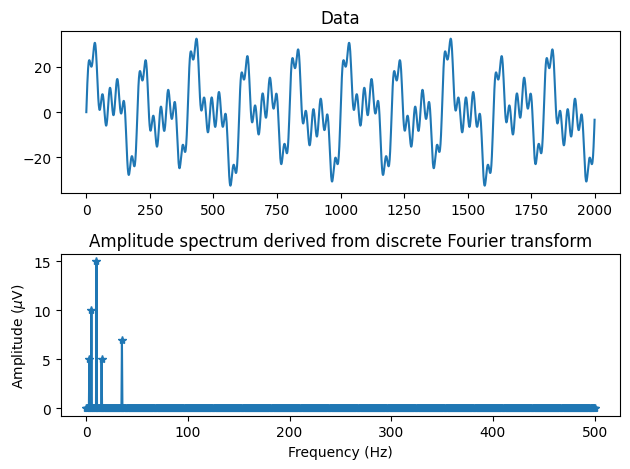

In [3]:
plt.subplot(211)
plt.plot(signal)
plt.title("Data")

plt.subplot(212)
plt.plot(frequencies, np.abs(fourierCoefs[:len(frequencies)]) * 2, "*-")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude ($\mu$V)")
plt.title("Amplitude spectrum derived from discrete Fourier transform")

plt.tight_layout()

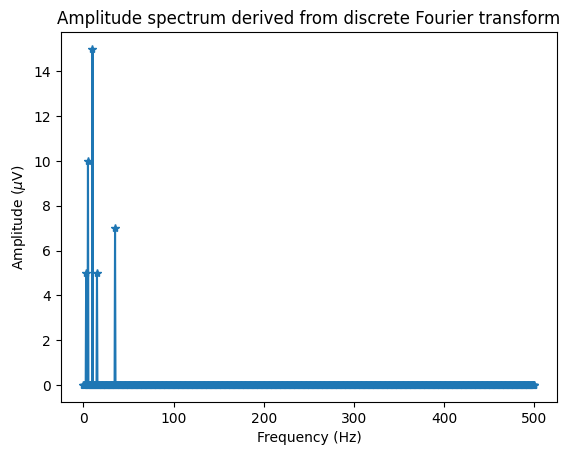

In [4]:
fourierCoefsF = scipy.fft.fft(signal) / N

plt.plot(frequencies, np.abs(fourierCoefsF[:len(frequencies)])*2, "*-")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude ($\mu$V)")
plt.title("Amplitude spectrum derived from discrete Fourier transform")
plt.show()